cf. [`ComputationalPhysics/doc/Programs/LecturePrograms/programs/StatPhys/python/ising2dim.py`](https://github.com/CompPhysics/ComputationalPhysics/blob/master/doc/Programs/LecturePrograms/programs/StatPhys/python/ising2dim.py)

In [1]:
import numpy
import numpy as np
import sys
import math

## Periodic boundary conditions 

In [5]:
def periodic(i,limit,add): 
    """
    Choose correct matrix index with periodic boundary conditions
    
    Input:
    - i:     Base index
    - limit: Highest \"legal\" index
    - add:   Number to add or subtract from i
    """
    return (i + limit + add) % limit

Set up spin matrix, initialize to ground state

In [6]:
size = 256 # L_x
temp = 10. # temperature T

In [3]:
spin_matrix = np.zeros( (size,size), np.int8) + 1

In [4]:
spin_matrix

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

Create and initialize variables 

In [5]:
E = M = 0 
E_av = E2_av = M_av = M2_av = Mabs_av = 0 

Setup array for possible energy changes 

In [7]:
w = np.zeros(17, np.float64)
for de in xrange(-8,9,4):
    print de 
    w[de+8] = math.exp(-de/temp)

-8
-4
0
4
8


In [8]:
print w

[ 2.22554093  0.          0.          0.          1.4918247   0.          0.
  0.          1.          0.          0.          0.          0.67032005
  0.          0.          0.          0.44932896]


Calculate initial magnetization

In [10]:
M = spin_matrix.sum()
print M

65536


Calculate initial energy

In [15]:
# for i in xrange(16): print i  r
# range creates a list, so if you do range(1, 10000000) it creates a list in memory with 9999999 elements.
# xrange is a sequence object that evaluates lazily. 

In [17]:
for j in xrange(size):
    for i in xrange(size):
        E -= spin_matrix.item(i,j) * (spin_matrix.item(periodic(i,size,-1),j) + spin_matrix.item(i,periodic(j,size,1)))


Metropolis MonteCarlo computation, 1 single step or iteration, done explicitly:  

In [18]:
x = int(np.random.random()*size)
print(x)
y = int(np.random.random()*size)
print(y)

99
220


In [20]:
deltaE = 2*spin_matrix.item(i,j) * \
          (spin_matrix.item(periodic(x,size,-1),y) + spin_matrix.item(periodic(x,size,1),y) + \
          spin_matrix.item(x,periodic(y,size,-1))+spin_matrix.item(x,periodic(y,size,1)))  
print(deltaE)

8


In [21]:
print( w[deltaE + 8] )

0.449328964117


In [22]:
np.random.random()

0.14065460780085948

In [23]:
print( np.random.random() <= w[deltaE+8])

True


Accept (if True)!

In [25]:
print( spin_matrix[x,y] )
print( spin_matrix.item(x,y) )

1
1


In [26]:
spin_matrix[x,y] *= -1
M += 2*spin_matrix[x,y]
E += deltaE
print(spin_matrix.item(x,y))
print(M)
print(E)

-1
65534
-131064


In [27]:
import pygame

ImportError: No module named pygame

## Initialize (all spins up), explicitly shown 

In [11]:
Lx=256; Ly=256
spin_matrix = np.zeros((Lx,Ly),np.int8)

In [14]:
print(spin_matrix.shape)
spin_matrix.fill(1)
spin_matrix

(256, 256)


array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

In [18]:
def initialize_allup( spin_matrix, J=1.0 ):
    Lx,Ly = spin_matrix.shape
    
    spin_matrix.fill(1)
    M = spin_matrix.sum()
    # Calculate initial energy  
    E=0
    for j in xrange(Ly):
        for i in xrange(Lx):
            E += (-J)*spin_matrix.item(i,j) * \
                (spin_matrix.item(periodic(i,Lx,+1),j) + spin_matrix.item(i,periodic(j,Ly,1)) )
    print "M: ",M," E: ", E
    return E,M    

In [19]:
E,M = initialize_allup( spin_matrix)

M:  65536  E:  -131072.0


In [20]:
def initialize_allup1( spin_matrix, J=1.0 ):
    Lx,Ly = spin_matrix.shape
    
    spin_matrix.fill(1)
    M = spin_matrix.sum()
    # Calculate initial energy  
    E=0
    for j in xrange(Ly):
        for i in xrange(Lx):
            E -= J*spin_matrix.item(i,j) * \
                (spin_matrix.item(periodic(i,Lx,-1),j) + spin_matrix.item(i,periodic(j,Ly,1)) )
    print "M: ",M," E: ", E
    return E,M   

In [21]:
E,M = initialize_allup( spin_matrix)

M:  65536  E:  -131072.0


In [22]:
Lx=512; Ly=512
spin_matrix = np.zeros((Lx,Ly),np.int8)

In [23]:
E,M = initialize_allup1( spin_matrix)
E,M = initialize_allup( spin_matrix)

M:  262144  E:  -524288.0
M:  262144  E:  -524288.0


In [25]:
Lx=1024; Ly=1024
print(Lx*Ly)
spin_matrix = np.zeros((Lx,Ly),np.int8)

1048576


In [26]:
E,M = initialize_allup1( spin_matrix)
E,M = initialize_allup( spin_matrix)

M:  1048576  E:  -2097152.0
M:  1048576  E:  -2097152.0


In [27]:
math.pow(2,31)

2147483648.0

## Setup array for possible energy changes  

In [29]:
temp = 1.0

In [30]:
w = np.zeros(17,np.float32)
for de in xrange(-8,9,4): # include +8
    w[de+8] = math.exp(-de/temp)  

In [31]:
print(w)

[  2.98095801e+03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   5.45981483e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.83156393e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   3.35462624e-04]


## Importing from the script `ising2dim.py` 

In [2]:
import os

In [3]:
print(os.getcwd())
print(os.listdir( os.getcwd() ))

/home/topolo/PropD/CompPhys/Cpp/Ising
['ising', '.ipynb_checkpoints', 'ising_2dim', 'IsingGPU', 'ising_2dim.cpp', 'Ising', 'ising2dim.py', 'ising.gz', 'ising.ipynb']


In [4]:
sys.path.append('./')

# Reading out data from `./IsingGPU/FileIO/output.h`  

Data is generated by the parallel Metropolis algorithm in CUDA C++ in the subdirectory `./IsingGPU/data/`, which is done by the function `process_avgs` in `./IsingGPU/FileIO/output.h`.  The values are saved as a character array, which then can be read in as a NumPy array of `float32`'s.  Be sure to enforce, declare the `dtype` to be `float32`.    

In [3]:
avgsresults_GPU = np.fromfile("./IsingGPU/data/IsingMetroGPU.bin",dtype=np.float32)

In [4]:
print(avgsresults_GPU.shape)
print(avgsresults_GPU.size)

(1407,)
1407


In [7]:
avgsresults_GPU = avgsresults_GPU.reshape(201,7) # 7 different averages
print(avgsresults_GPU.shape)
print(avgsresults_GPU.size)

(201, 7)
1407


In [8]:
avgsresults_GPU

array([[  1.00000000e+00,  -6.19936562e+00,   6.14543200e+06, ...,
         -1.68125000e+02,   9.98943210e-01,   1.14767216e+18],
       [  1.00999999e+00,  -6.53594589e+00,   7.13536000e+06, ...,
         -2.11687500e+02,   9.98923302e-01,   1.14729544e+18],
       [  1.01999998e+00,  -7.08365774e+00,   8.92425200e+06, ...,
         -2.28750000e+01,   9.98698294e-01,   1.14691006e+18],
       ..., 
       [  2.97999811e+00,  -3.79247021e+03,   6.91525386e+11, ...,
          2.65114838e+02,   2.44667777e-03,   1.21362773e+14],
       [  2.98999810e+00,  -3.79189673e+03,   6.92151386e+11, ...,
          2.61317871e+02,   2.44078762e-03,   1.19340397e+14],
       [  2.99999809e+00,  -3.79308301e+03,   6.90945524e+11, ...,
          2.57524719e+02,   2.43111840e-03,   1.17293518e+14]], dtype=float32)

In [9]:
import matplotlib.pyplot as plt

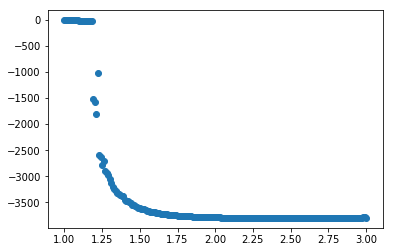

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
T = avgsresults_GPU[:,0]
E_avg = avgsresults_GPU[:,1]
ax.scatter( T, E_avg)
plt.show()

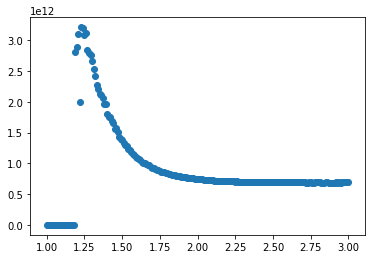

In [14]:
Evar_avg = avgsresults_GPU[:,2]
plt.scatter( T, Evar_avg)
plt.show()

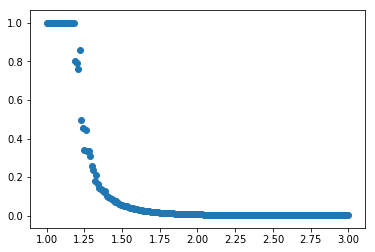

In [20]:
M_avg = avgsresults_GPU[:,3]
Mvar_avg = avgsresults_GPU[:,4]
absM_avg = avgsresults_GPU[:,5]
M4_avg = avgsresults_GPU[:,6]
#fig = plt.figure()
#ax = fig.add_subplot(4,1,1)
plt.scatter( T, M_avg)
#fig.add_subplot(4,1,2)
#plt.scatter(T,Mvar_avg)
#fig.add_subplot(4,1,3)
#plt.scatter(T,absM_avg)
#fig.add_subplot(4,1,4)
#plt.scatter(T,M4_avg)
plt.show()

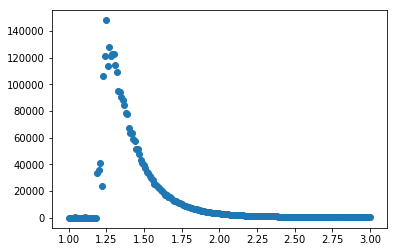

In [21]:
plt.scatter(T,Mvar_avg)
plt.show()

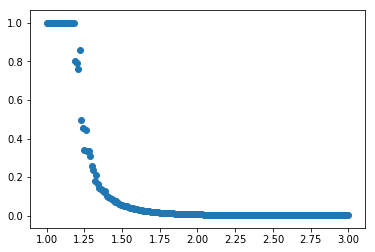

In [22]:
plt.scatter(T,absM_avg)
plt.show()

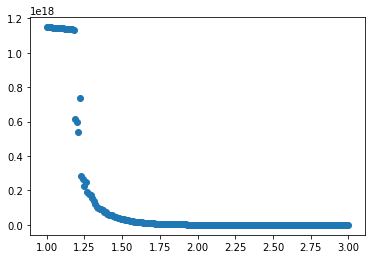

In [23]:
plt.scatter(T,M4_avg)
plt.show()